# Set-up

In [908]:
# --- Standard library ---
import pickle

# --- Scientific computing ---
import numpy as np

# --- Network science ---

# --- Data handling and visualization ---
import pandas as pd

import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline

PALETTE = ["lightblue", "red", "blue"]
FIGROOT = "../../results/plots/"

# --- Project source code ---

In [909]:
metadata = {
    "PROJECT_ID": "EMB_ex33",
    "RESEARCHERS": "DK",
    "CURRENT_VERSION": "v2.1",
    "DATE": "20230417"
}
TAG = "{PROJECT_ID}{CURRENT_VERSION}_{RESEARCHERS}_{DATE}".format(**metadata)

df = pd.read_csv(f"../../results/dataframes/dataframe_{TAG}.csv")

In [910]:
df = df.replace({
    "{'imb'}": "Intercept",
    "{'emb'}": "Embedding",
    "{'deg'}": "Degree",
    "{'imb', 'emb'}": "Intercept + Embedding",
    "{'emb', 'imb'}": "Intercept + Embedding",
    "{'imb', 'deg'}": "Intercept + Degree",
    "{'deg', 'imb'}": "Intercept + Degree",
    "{'emb', 'deg'}": "Embedding + Degree",
    "{'deg', 'emb'}": "Embedding + Degree",
    "{'imb', 'emb', 'deg'}": "Intercept + Embedding + Degree",
    "{'imb', 'deg', 'emb'}": "Intercept + Embedding + Degree",
    "{'emb', 'deg', 'imb'}": "Intercept + Embedding + Degree",
    "{'emb', 'imb', 'deg'}": "Intercept + Embedding + Degree",
    "{'deg', 'imb', 'emb'}": "Intercept + Embedding + Degree",
    "{'deg', 'emb', 'imb'}": "Intercept + Embedding + Degree",
})

In [911]:
df["gamma"] = df.system.apply(lambda x: float(x.split("_")[1].split("-")[1]))

In [912]:
df = df.drop(columns=["Unnamed: 0", "system", "l1", "l2", "log_penalty"])

# Performance analysis

## Trade-off measures

In [913]:
BOX = [(0,0),(1,1)]  # lower left, upper right

_features = ["Intercept + Embedding", "Intercept + Degree", "Intercept + Embedding + Degree"]
df_ = df.query("features in @_features")

<Figure size 640x480 with 0 Axes>

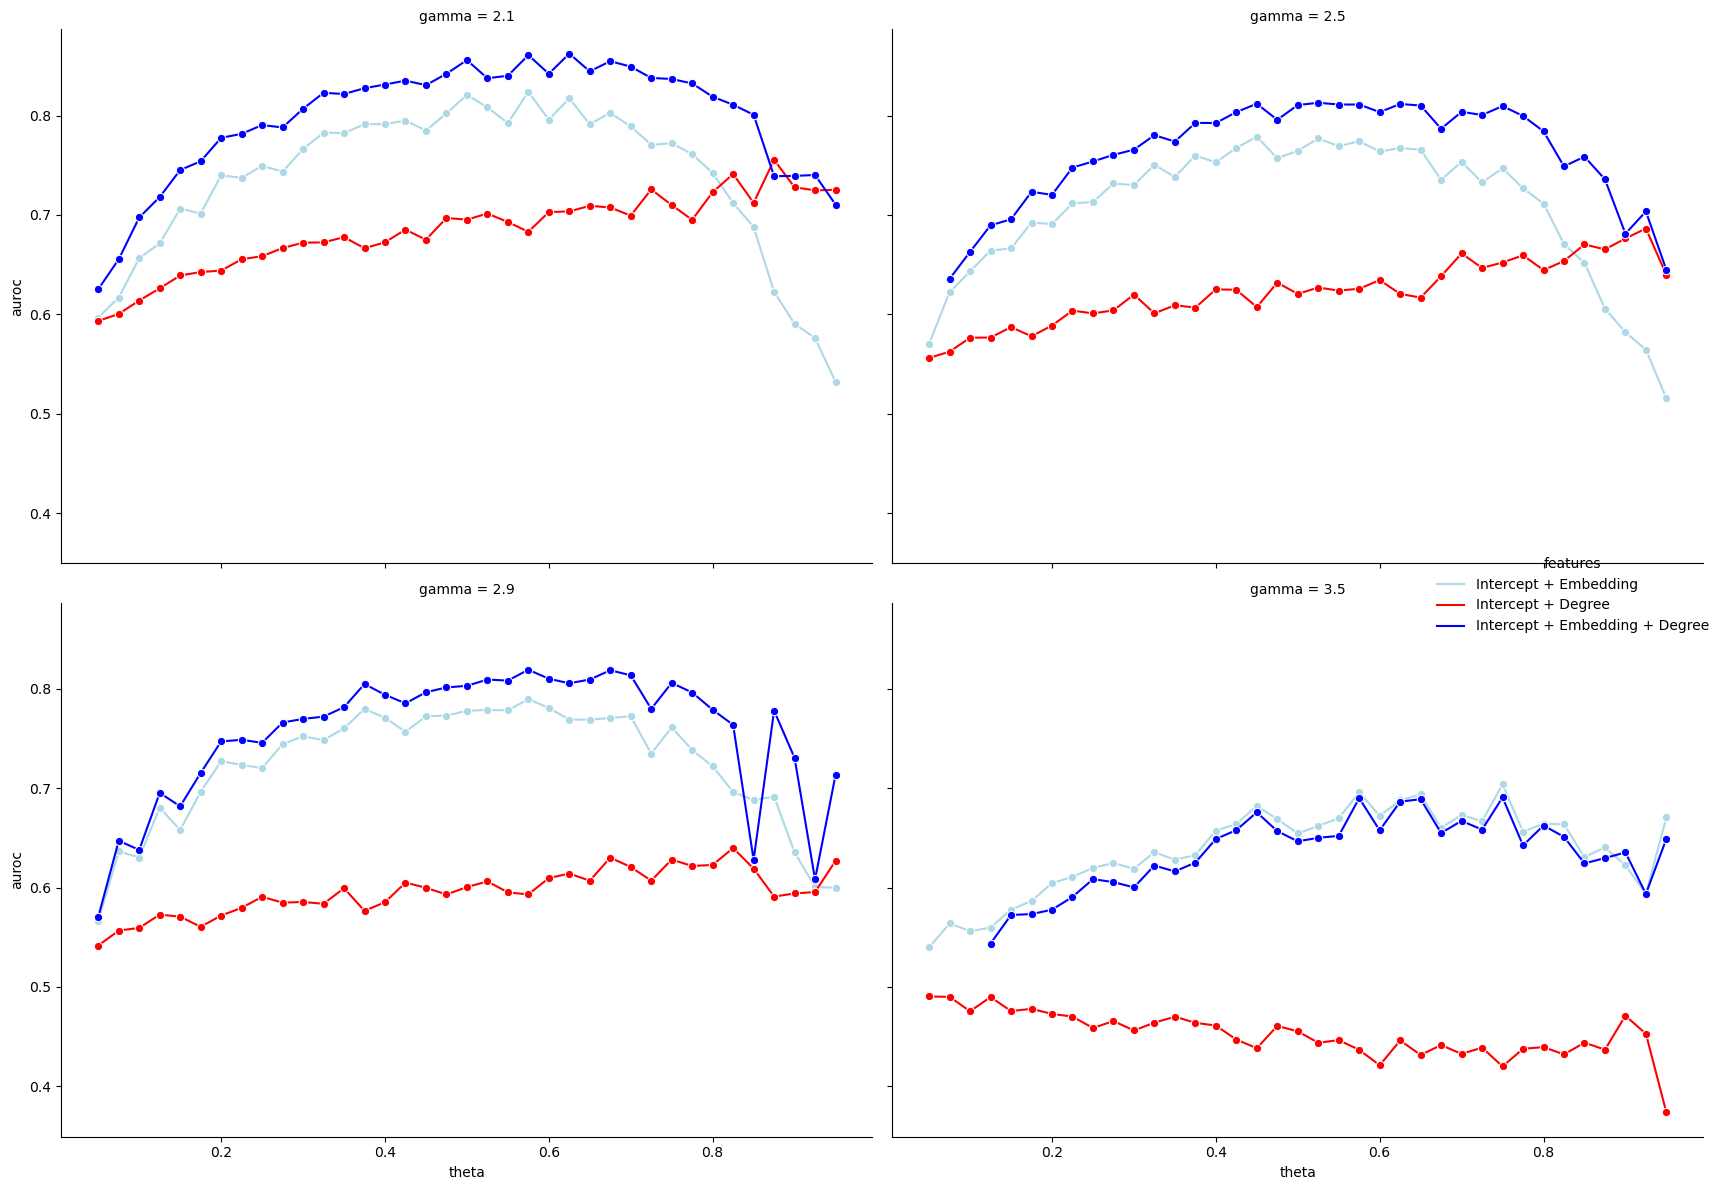

In [914]:
# Instantiate figure, subset relevant data
plt.figure()

# Plotting data
sns.relplot(
    data=df_, kind="line",
    x="theta", y="auroc",
    hue="features", palette=PALETTE,
    col="gamma", col_wrap=2,
    marker="o",
    height=6, aspect=1.2,
)

# Axes configuration

# Figure-level attributes

# Save plot
plt.tight_layout()
plt.savefig(
    f"{FIGROOT}/line_auroc-theta_col-gamma_hue-features_{TAG}.png",
    facecolor="white",
    transparent=False
)

<Figure size 640x480 with 0 Axes>

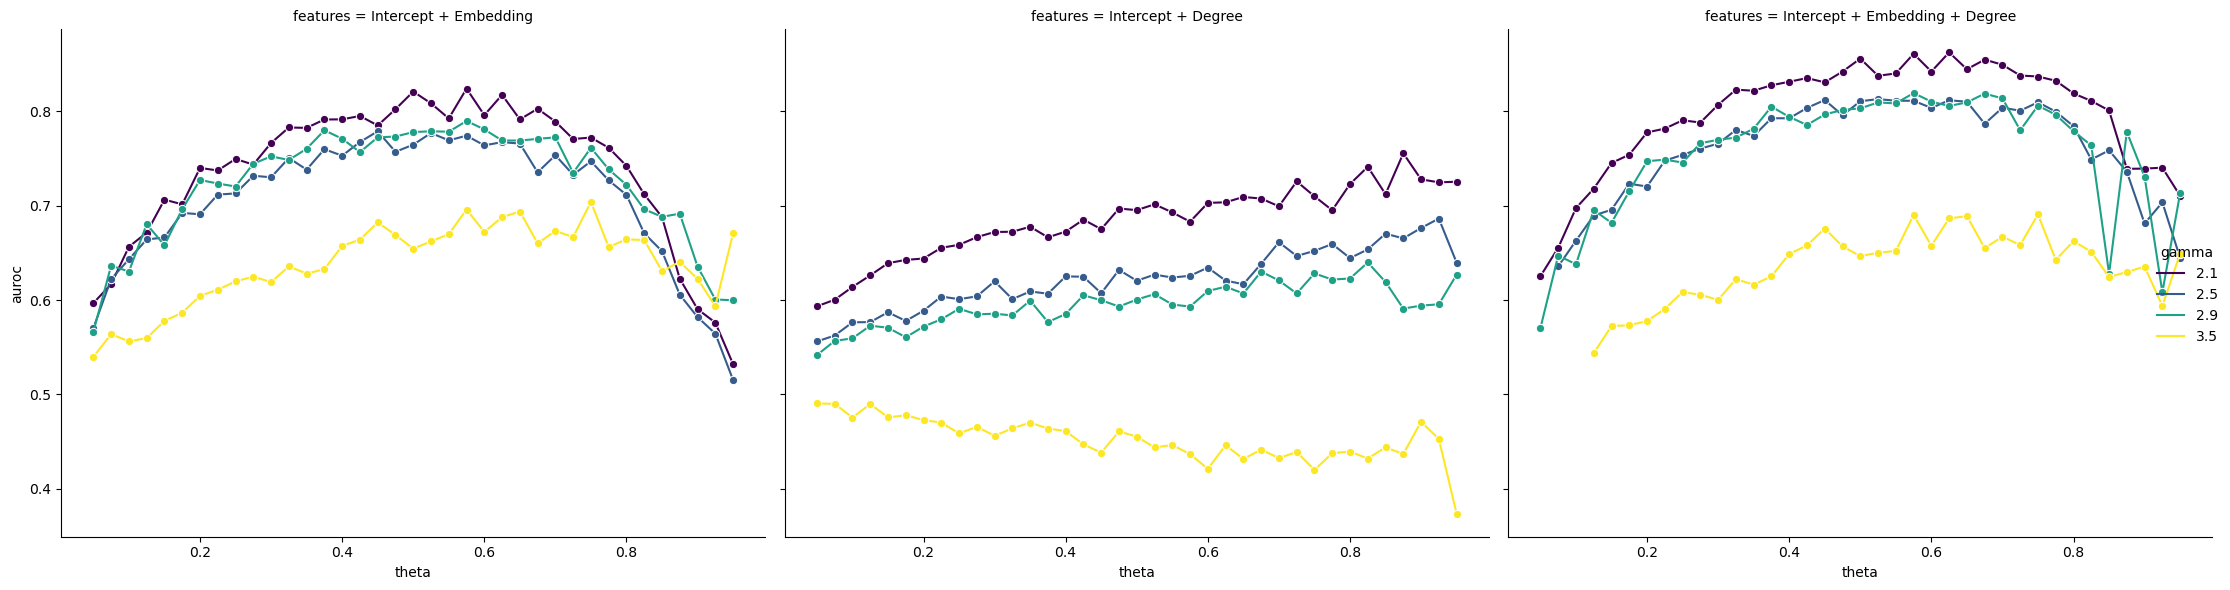

In [915]:
# Instantiate figure, subset relevant data
plt.figure()

# Plotting data
sns.relplot(
    data=df_, kind="line",
    x="theta", y="auroc",
    hue="gamma", palette="viridis",
    col="features",
    marker="o",
    height=6, aspect=1.2,
)

# Axes configuration

# Figure-level attributes

# Save plot
plt.tight_layout()
plt.savefig(
    f"{FIGROOT}/line_auroc-theta_hue-gamma_col-features_{TAG}.png",
    facecolor="white",
    transparent=False
)

### Case Studies

#### Easy

<Figure size 640x480 with 0 Axes>

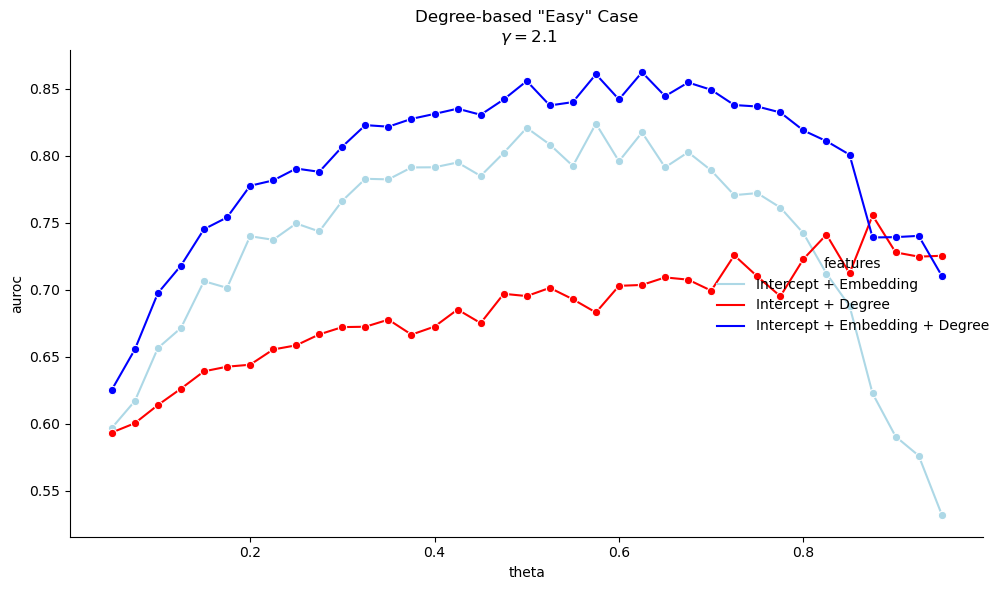

In [916]:
# Instantiate figure, subset relevant data
case_easy_gamma = 2.1  # strong degree heterogeneity
case_easy = df_.query("gamma == @case_easy_gamma")
plt.figure()

# Plotting data
sns.relplot(
    data=case_easy, kind="line",
    x="theta", y="auroc",
    hue="features", palette=PALETTE,
    marker="o",
    height=6, aspect=1.2,
)

# Axes configuration

# Figure-level attributes
plt.title(f"Degree-based \"Easy\" Case\n $\\gamma = ${case_easy_gamma}")

# Save plot
plt.tight_layout()

#### Hard

<Figure size 640x480 with 0 Axes>

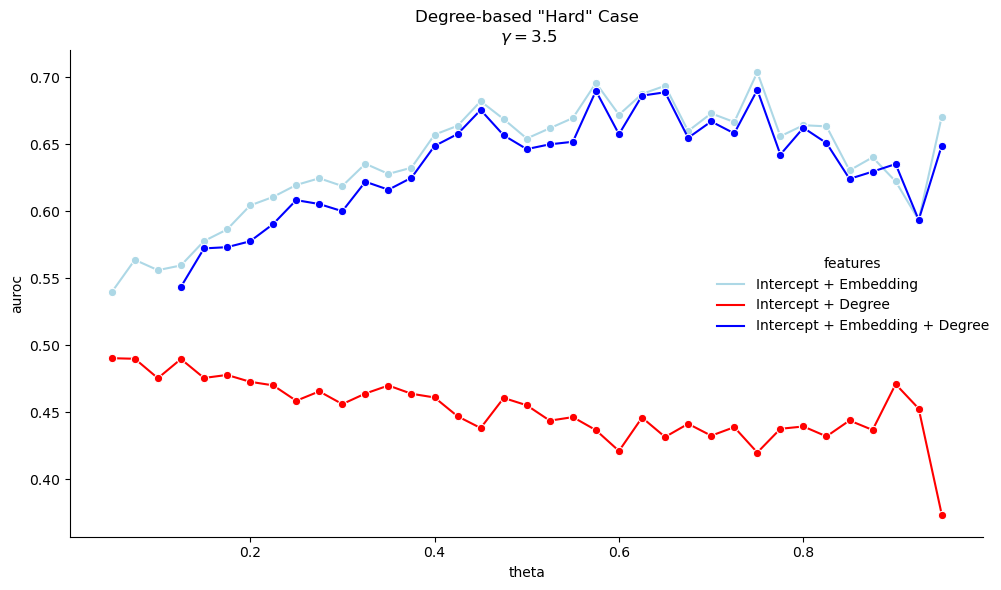

In [917]:
# Instantiate figure, subset relevant data
case_hard_gamma = 3.5  # strong degree heterogeneity
case_hard = df_.query("gamma == @case_hard_gamma")
plt.figure()

# Plotting data
sns.relplot(
    data=case_hard, kind="line",
    x="theta", y="auroc",
    hue="features", palette=PALETTE,
    marker="o",
    height=6, aspect=1.2,
)

# Axes configuration

# Figure-level attributes
plt.title(f"Degree-based \"Hard\" Case\n $\\gamma = ${case_hard_gamma}")

# Save plot
plt.tight_layout()

#### Extremum comparison

<Figure size 640x480 with 0 Axes>

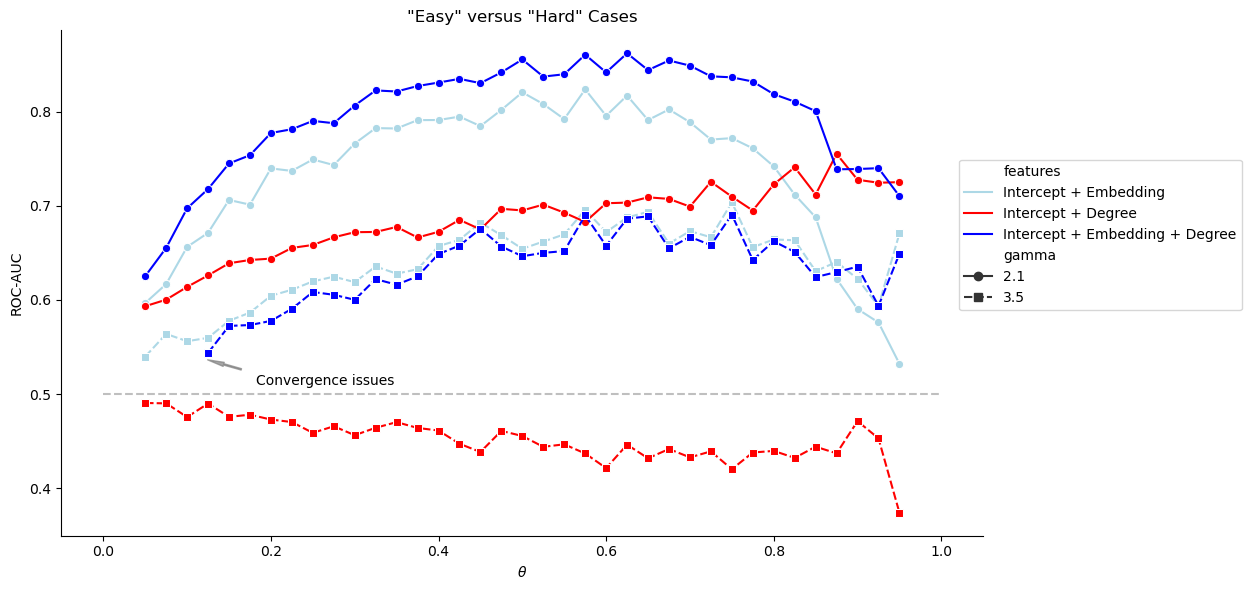

In [918]:
# Instantiate figure, subset relevant data
case_compare_gamma = [2.1, 3.5]  # strong degree heterogeneity
case_compare = df_.query("gamma in @case_compare_gamma")
plt.figure()

# Plotting data
ax = sns.relplot(
    data=case_compare, kind="line",
    x="theta", y="auroc",
    hue="features", palette=PALETTE,
    style="gamma",
    markers=["o", "s"],
    height=6, aspect=1.2,
)
plt.hlines(0.5, 0, 1, linestyle="--", color="gray", alpha=0.5)

# Axes configuration
plt.xlabel("$\\theta$")
plt.ylabel("ROC-AUC")


# Figure-level attributes
sns.move_legend(ax, "center right", bbox_to_anchor=(1.25,0.6), ncol=1, frameon=True)
plt.title(f"\"Easy\" versus \"Hard\" Cases")
plt.annotate(
    "Convergence issues",
    xy=(0.11, 0.54), xytext=(0.1825, 0.51),
    arrowprops={
        "shrink": 0.2,
        "width": 1,
        "headwidth": 3,
        "alpha": 0.7,
        "color": "gray"
    }
)

# Save plot
plt.tight_layout()

## Comparison with prior results

In [919]:
# Load prior results
with open("../../results/MEC/figure2b_data.pk", "rb") as _fh:
    df_f2b = pickle.load(_fh)
with open("../../results/MEC/figure2c_data.pk", "rb") as _fh:
    df_f2c = pickle.load(_fh)

# Reformat synthetic data
mus = []
gammas = []
pfis = []
aurocs = []
accs = []

for gamma, data_ in df_f2b.items():
    for idx, pfi in enumerate([0.0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]):
        mus.append(0.1)
        gammas.append(gamma)
        pfis.append(pfi)
        aurocs.append(data_[-1][idx])
        accs.append(data_[-2][idx])

for mu, data_ in df_f2c.items():
    for idx, pfi in enumerate([0.0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]):
        mus.append(mu)
        gammas.append(2.1)
        pfis.append(pfi)
        aurocs.append(data_[-1][idx])
        accs.append(data_[-2][idx])

df_f2 = pd.DataFrame({
    "avg_k": [5]*len(mus),
    "gamma": gammas,
    "mu": mus,
    "metric": ["DC"]*len(mus),
    "pfi": pfis,
    "rep": [1]*len(mus),
    "AUROC": aurocs,
    "Accuracy": accs,
    "Embedding": ["DC"]*len(mus)
})

### Comparison case studies

<Figure size 640x480 with 0 Axes>

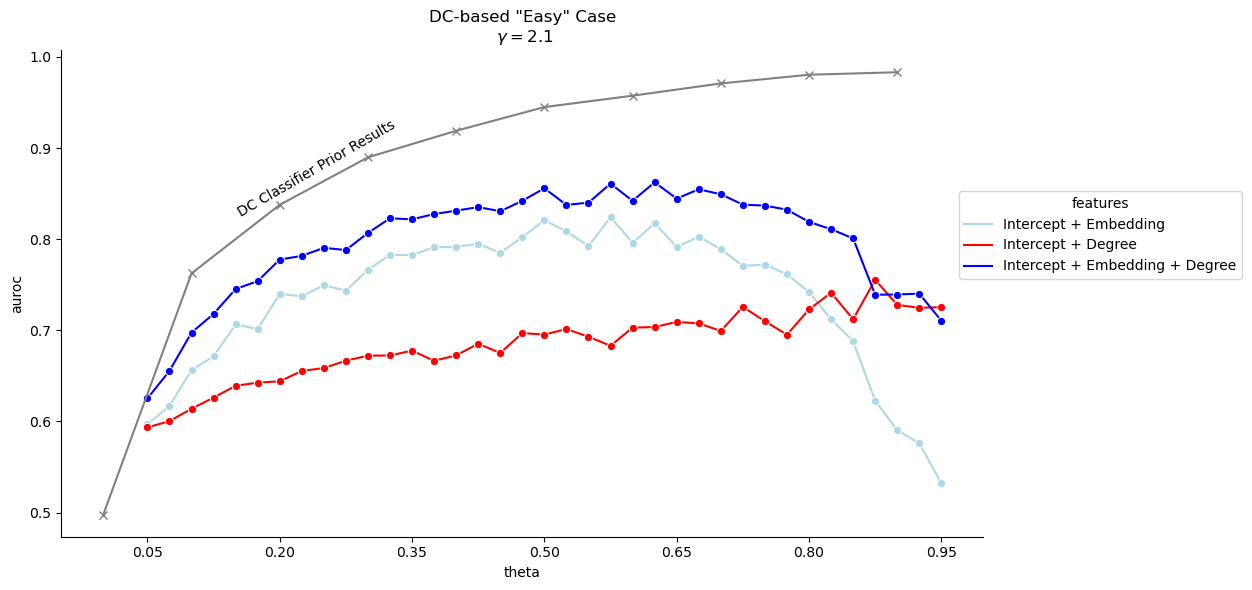

In [920]:
# Instantiate figure, subset relevant data
case_easy_gamma = 2.1  # strong degree heterogeneity
case_easy = df_.query("gamma == @case_easy_gamma")
case_easy_prior = df_f2.query("gamma == @case_easy_gamma & mu == 0.1")
plt.figure()

# Plotting data
ax = sns.relplot(
    data=case_easy, kind="line",
    x="theta", y="auroc",
    hue="features", palette=PALETTE,
    marker="o",
    height=6, aspect=1.2,
)
plt.plot(case_easy_prior.pfi[:10], case_easy_prior.AUROC[:10], linestyle="-", color="gray", marker="x")

# Axes configuration
plt.xticks(sorted(set(case_easy.theta))[::6])

# Figure-level attributes
plt.title(f"DC-based \"Easy\" Case\n $\\gamma = ${case_easy_gamma}")
plt.annotate(
    "DC Classifier Prior Results",
    xy=(0.2, 0.85), xytext=(0.15, 0.825),
    rotation=30
)
sns.move_legend(ax, "center right", bbox_to_anchor=(1.25,0.6), ncol=1, frameon=True)

# Save plot
plt.tight_layout()
plt.savefig(
    f"{FIGROOT}/line_auroc-theta_hue-features_gamma-2.1_compare-DC_{TAG}.png",
    facecolor="white",
    transparent=False
)

<Figure size 640x480 with 0 Axes>

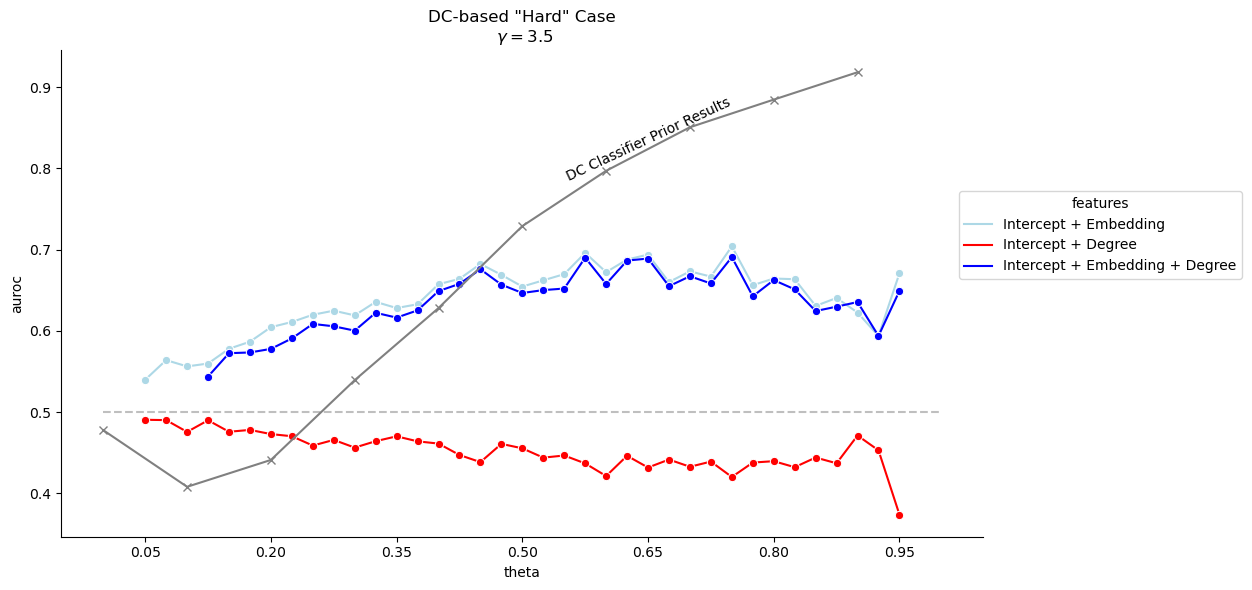

In [921]:
# Instantiate figure, subset relevant data
case_easy_gamma = 3.5  # strong degree heterogeneity
case_easy = df_.query("gamma == @case_easy_gamma")
case_easy_prior = df_f2.query("gamma == @case_easy_gamma & mu == 0.1")
plt.figure()

# Plotting data
ax = sns.relplot(
    data=case_easy, kind="line",
    x="theta", y="auroc",
    hue="features", palette=PALETTE,
    marker="o",
    height=6, aspect=1.2,
)
plt.plot(case_easy_prior.pfi[:10], case_easy_prior.AUROC[:10], linestyle="-", color="gray", marker="x")
plt.hlines(0.5, 0, 1, linestyle="--", color="gray", alpha = 0.5)


# Axes configuration
plt.xticks(sorted(set(case_easy.theta))[::6])

# Figure-level attributes
plt.title(f"DC-based \"Hard\" Case\n $\\gamma = ${case_easy_gamma}")
plt.annotate(
    "DC Classifier Prior Results",
    xy=(0.2, 0.85), xytext=(0.55, 0.785),
    rotation=25
)
sns.move_legend(ax, "center right", bbox_to_anchor=(1.25,0.6), ncol=1, frameon=True)

# Save plot
plt.tight_layout()
plt.savefig(
    f"{FIGROOT}/line_auroc-theta_hue-features_gamma-3.5_compare-DC_{TAG}.png",
    facecolor="white",
    transparent=False
)

### Amalgamated comparisons

<Figure size 640x480 with 0 Axes>

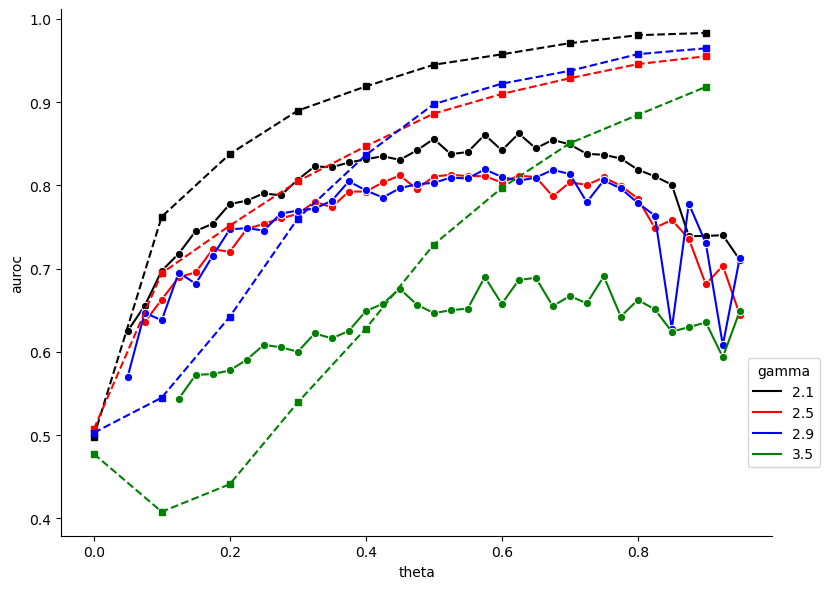

In [922]:
# Instantiate figure, subset relevant data
df__ = df.query("features == 'Intercept + Embedding + Degree'")
prior_ = df_f2.query("mu == 0.1")
plt.figure()

COLORS = ["black", "red", "blue", "green"]

# Plotting data
ax = sns.relplot(
    data=df__, kind="line",
    x="theta", y="auroc",
    hue="gamma", palette=COLORS,
    marker="o",
    height=6, aspect=1.2,
)

_c = 0
for gamma, data_ in prior_.groupby("gamma"):
    plt.plot(
        data_.pfi[:10], data_.AUROC[:10],
        label=gamma, color=COLORS[_c],
        marker="s", linestyle="--",
        markersize=4
    )
    _c += 1

# Axes configuration
# plt.xticks(sorted(set(case_easy.theta))[::6])

# Figure-level attributes


sns.move_legend(ax, "lower right", bbox_to_anchor=(1.05,0.2), frameon=True)

# Save plot
plt.tight_layout()

## Singular measures

<Figure size 640x480 with 0 Axes>

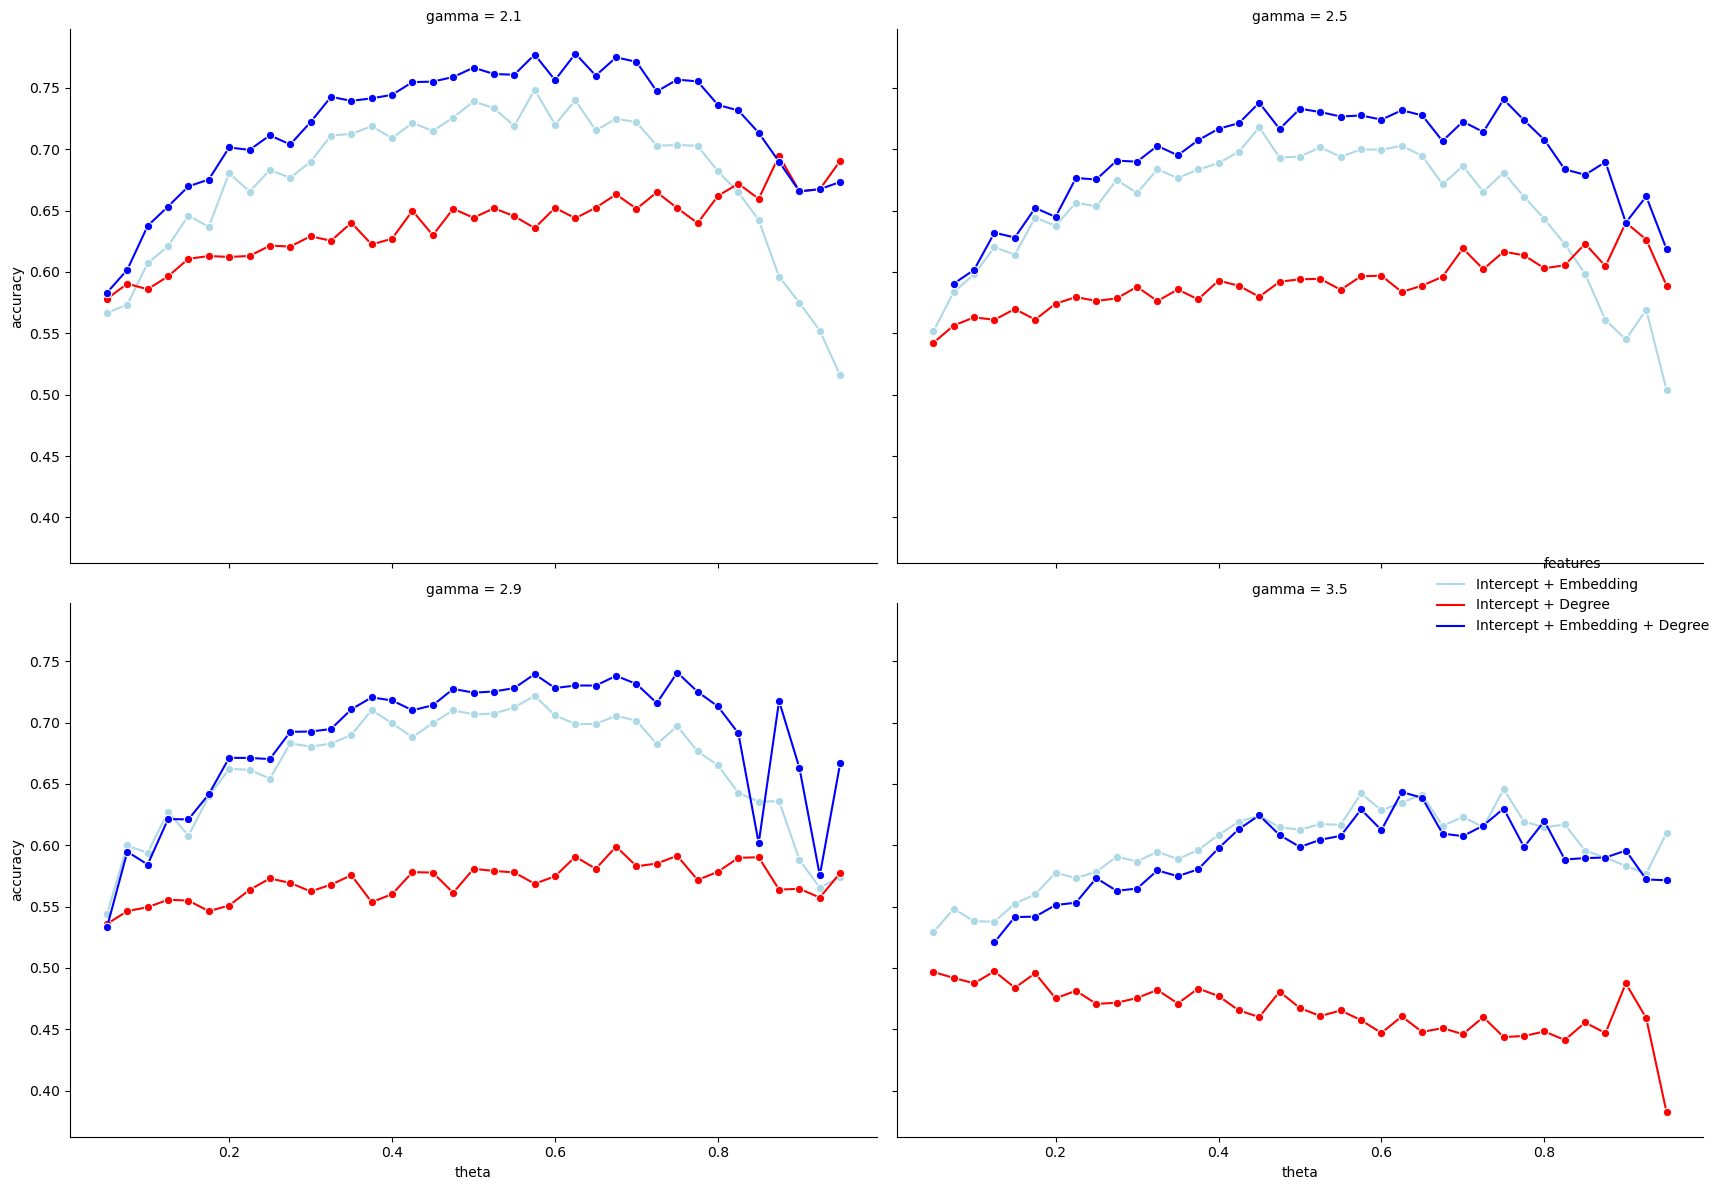

In [923]:
# Instantiate figure, subset relevant data
plt.figure()

# Plotting data
sns.relplot(
    data=df_, kind="line",
    x="theta", y="accuracy",
    hue="features", palette=PALETTE,
    col="gamma", col_wrap=2,
    marker="o",
    height=6, aspect=1.2,
)

# Axes configuration

# Figure-level attributes

# Save plot
plt.tight_layout()

# Coefficient analysis

## Preprocessing

In [924]:
gamma = 2.1
df_ = df.query("features in @_features")
df_ = df_.query("gamma == @gamma")

df_melted = df_.melt(
    id_vars=["theta", "features"],
    value_vars=["intercept", "coef_emb", "coef_deg"],
)
df_melted["absvalue"] = df_melted["value"].apply(np.abs)

## Coefficient evolution

<Figure size 640x480 with 0 Axes>

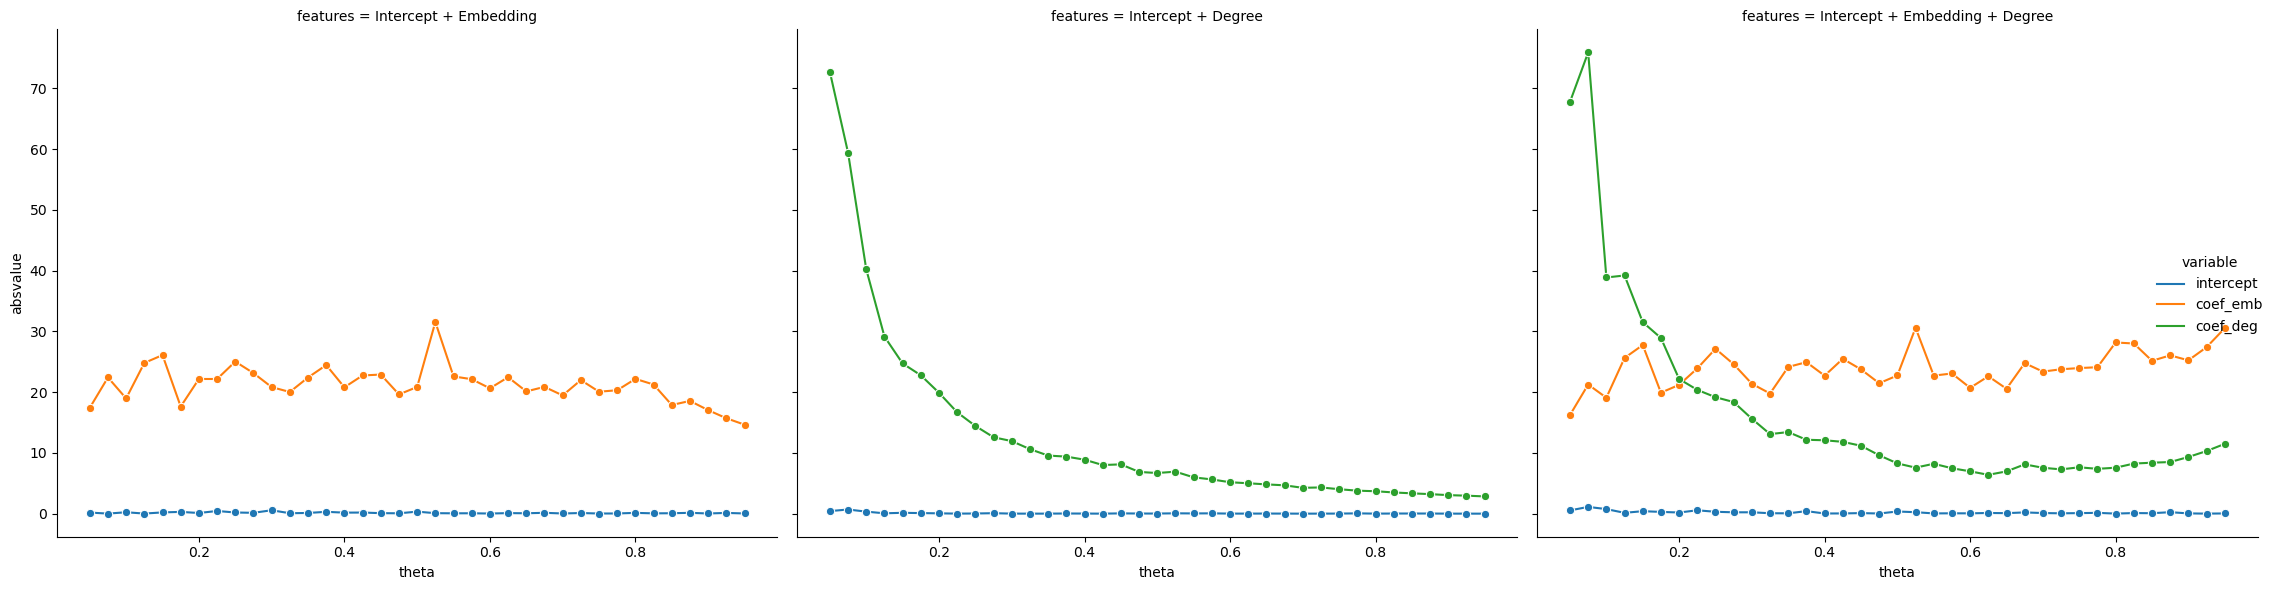

In [925]:
# Instantiate figure, subset relevant data
plt.figure()

# Plotting data
sns.relplot(
    data=df_melted, kind="line",
    x="theta", y="absvalue",
    hue="variable",
    col="features",
    marker="o",
    height=6, aspect=1.2,
)

# Axes configuration

# Figure-level attributes

# Save plot
plt.tight_layout()
plt.savefig(
    f"{FIGROOT}/line_abscoefs-theta_hue-feature_col-features_gamma-2.1_{TAG}.png",
    facecolor="white",
    transparent=False
)

<Figure size 640x480 with 0 Axes>

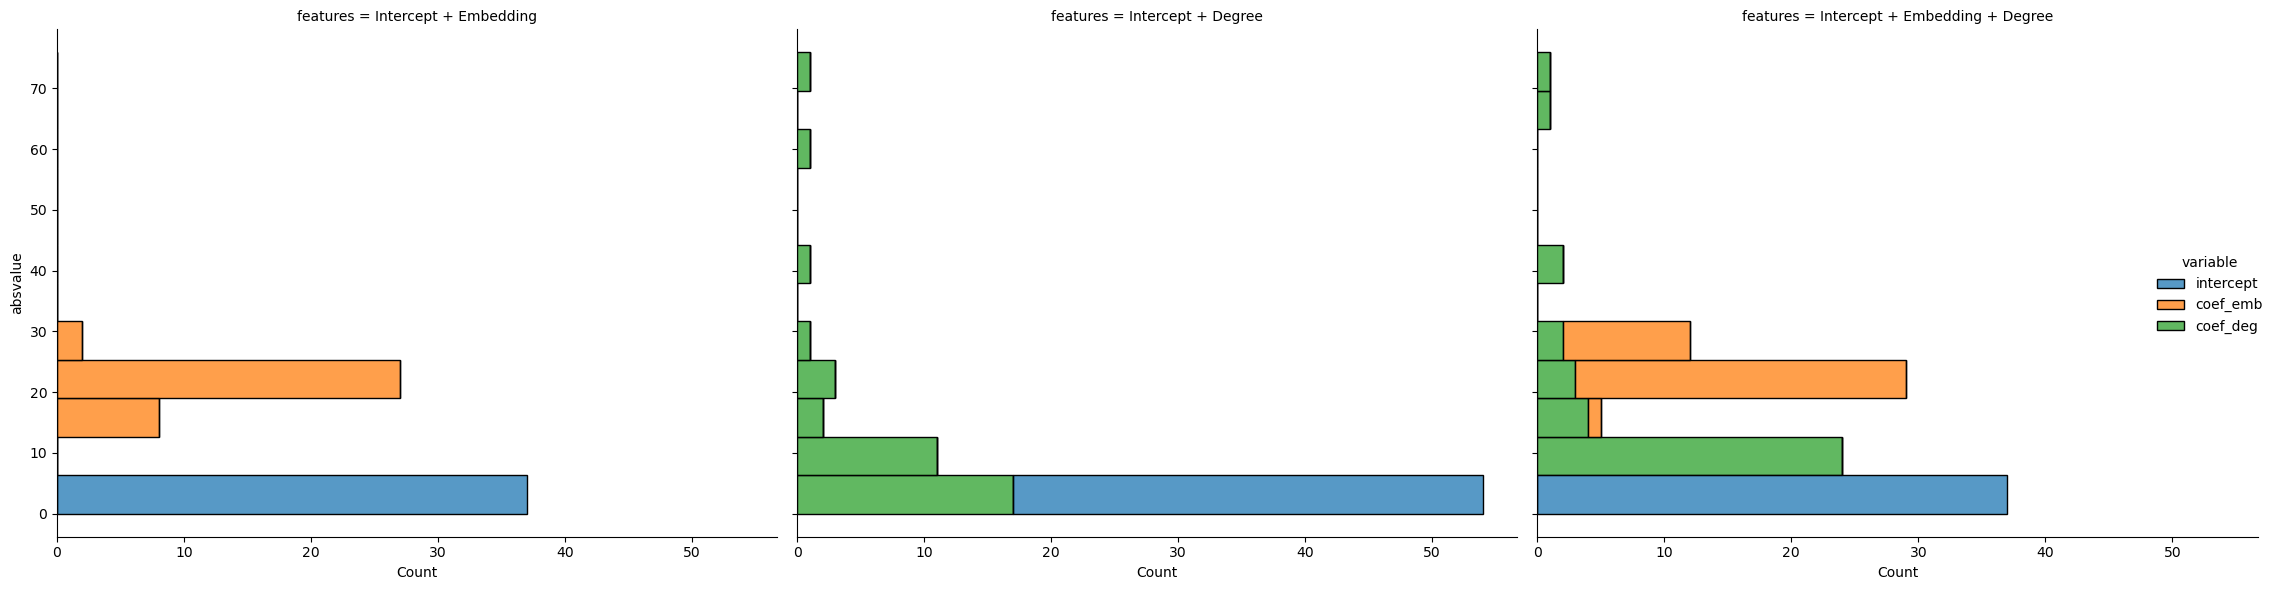

In [926]:
# Instantiate figure, subset relevant data
plt.figure()

# Plotting data
sns.displot(
    data=df_melted, kind="hist",
    y="absvalue",
    hue="variable",
    col="features",
    height=6, aspect=1.2,
    multiple="stack"
)

# Axes configuration

# Figure-level attributes

# Save plot
plt.tight_layout()

# Decision boundaries

In [927]:
def logistic(emb=0, deg=0, intercept=0, coef_emb=0, coef_deg=0):
    a = intercept + coef_emb*emb + coef_deg*deg
    b = 1 / (1 + np.exp(-a))

    return b

In [928]:
gamma = 2.1

Text(0.5, 1.0, '$\\gamma=$2.1 Decision Boundary\nIntercept + Embedding features')

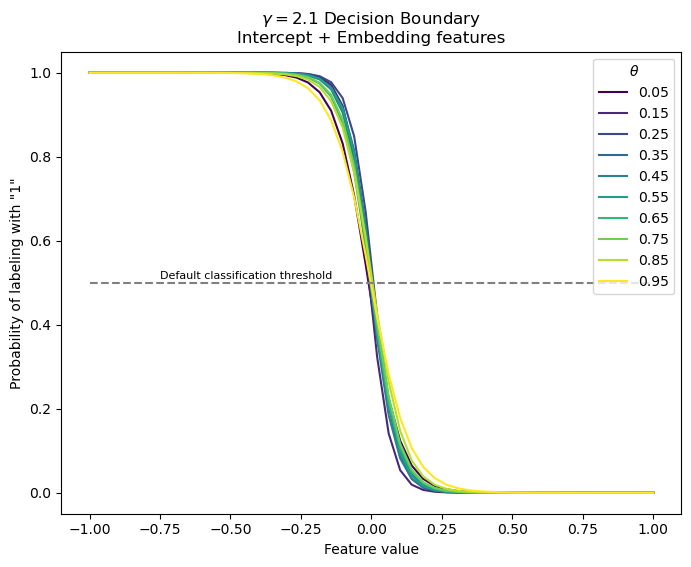

In [929]:
# Subset data
df_ = df.query("features == 'Intercept + Embedding' & gamma == @gamma")

# Set up predictor
deg = coef_deg = 0
X = np.linspace(-1,1)

# Set up figure
plt.figure(figsize=(8,6))
viridis = mpl.colormaps["viridis"]
idx = 0  # colormap index
theta_skip = 4  # so our legend isnt huge

# Plot predictors
for theta, df_group in list(df_.groupby("theta"))[::theta_skip]:
    # Calculate decision boundary
    intercept = df_group.iloc[0].intercept
    coef_emb = float(df_group.iloc[0].coefficients[1:-1])
    Y = [
        logistic(emb=x, deg=deg, intercept=intercept, coef_emb=coef_emb, coef_deg=coef_deg)
        for x in X
    ]

    # Plot logistic curve
    plt.plot(X, Y, label=f"{theta:.2f}", color=viridis(idx/9))

    # Increment colormap
    idx += 1

plt.hlines(0.5, -1, 1, linestyles="dashed", color="gray")
plt.legend(title="$\\theta$")

# Prettify figure
plt.annotate(
    "Default classification threshold",
    xy=(-0.5, 0.5), xytext=(-0.75, 0.51),
    size="8"
)
plt.xlabel("Feature value")
plt.ylabel("Probability of labeling with \"1\"")

plt.title(f"$\\gamma=${gamma} Decision Boundary\nIntercept + Embedding features")

Text(0.5, 1.0, '$\\gamma = $2.1 Decision Boundary\nIntercept + Degree features')

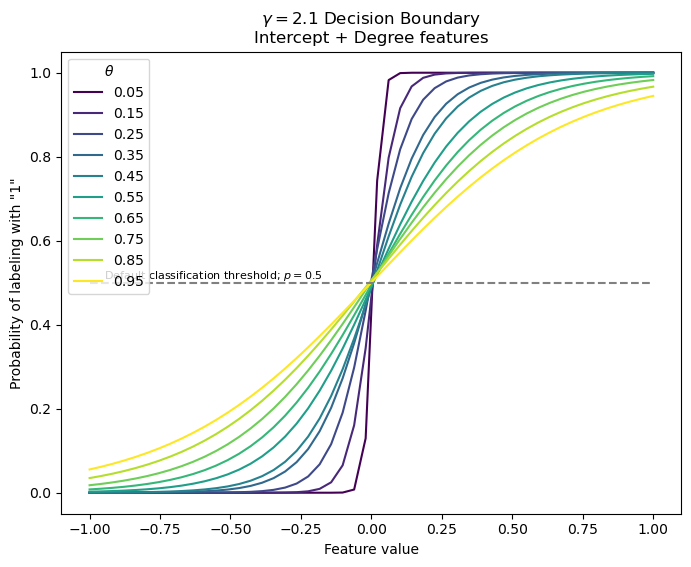

In [930]:
# Subset data
df_ = df.query("features == 'Intercept + Degree' & gamma == @gamma")

# Set up predictor
emb = coef_emb = 0
X = np.linspace(-1,1)

# Set up figure
plt.figure(figsize=(8,6))
viridis = mpl.colormaps["viridis"]
idx = 0  # colormap index
theta_skip = 4  # so our legend isnt huge

# Plot predictors
for theta, df_group in list(df_.groupby("theta"))[::theta_skip]:
    # Calculate decision boundary
    intercept = df_group.iloc[0].intercept
    coef_deg = float(df_group.iloc[0].coefficients[1:-1])
    Y = [
        logistic(emb=emb, deg=x, intercept=intercept, coef_emb=coef_emb, coef_deg=coef_deg)
        for x in X
    ]

    # Plot logistic curve
    plt.plot(X, Y, label=f"{theta:.2f}", color=viridis(idx/9))

    # Increment colormap
    idx += 1

plt.hlines(0.5, -1, 1, linestyles="dashed", color="gray")
plt.legend(title="$\\theta$")

# Prettify figure
plt.annotate(
    "Default classification threshold; $p=0.5$",
    xy=(-0.5, 0.5), xytext=(-0.95, 0.51),
    size="8"
)
plt.xlabel("Feature value")
plt.ylabel("Probability of labeling with \"1\"")

plt.title(f"$\\gamma = ${gamma} Decision Boundary\nIntercept + Degree features")

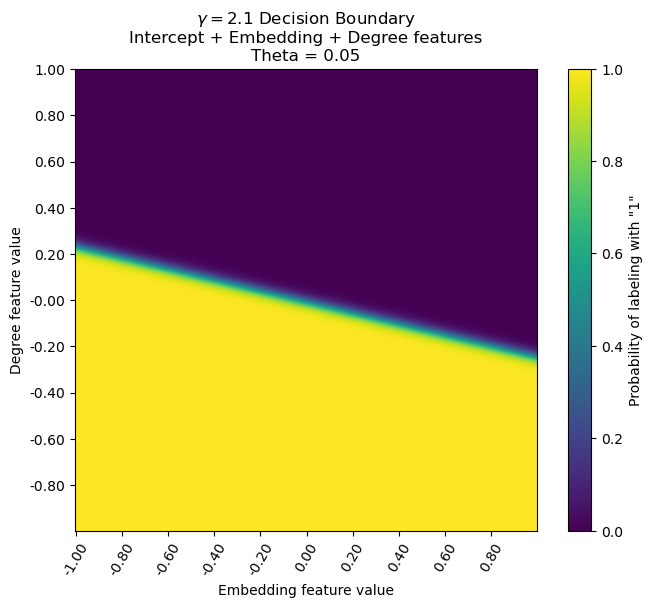

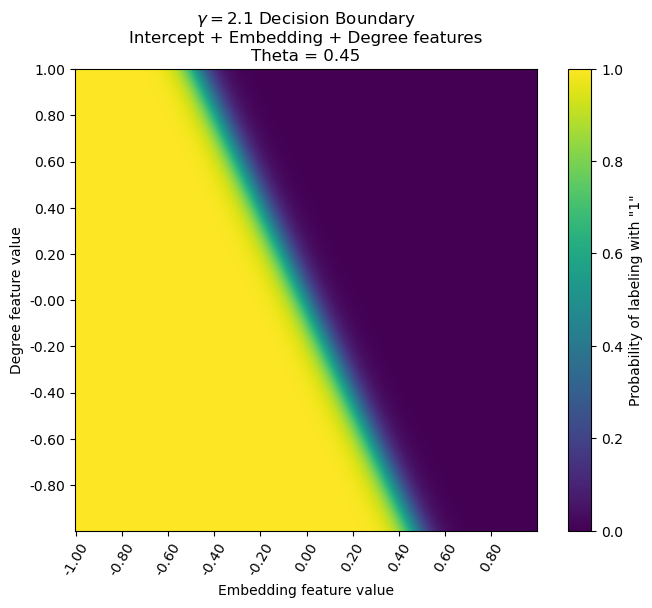

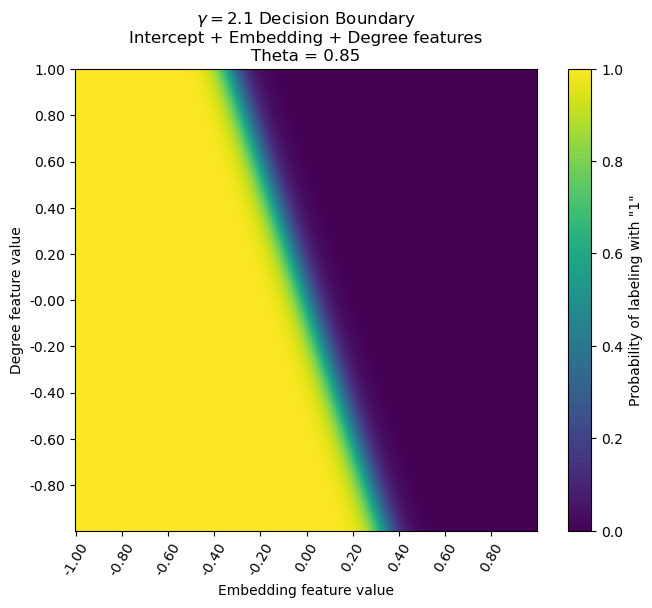

In [931]:
# Subset data
df_ = df.query("features == 'Intercept + Embedding + Degree' & gamma == @gamma")

# Set up predictor
X = np.linspace(-1,1, num=500)

# Set up figure

# Calculate decision boundary
for df_group in list(df_.groupby("theta"))[::16]:
    plt.figure(figsize=(8,6))
    theta, df_group = df_group
    intercept = df_group.iloc[0].intercept
    if intercept != intercept:
        continue
    coefs = df_group.iloc[0].coefficients[1:-1].split(", ")
    coef_emb = float(coefs[0])
    coef_deg = float(coefs[1])

    Z = np.array([
        logistic(emb=x, deg=y, intercept=intercept, coef_emb=coef_emb, coef_deg=coef_deg)
        for y in X for x in X
    ]).reshape(len(X), len(X))

    # Plot logistic curve
    plt.imshow(Z)

    # Prettify figure
    plt.colorbar(label="Probability of labeling with \"1\"")

    plt.xticks(range(len(X))[::50], labels=[f"{x:.2f}" for x in X[::50]], rotation=60)
    plt.yticks(range(len(X))[::50], labels=[f"{x:.2f}" for x in X[::-50]])

    plt.xlabel("Embedding feature value")
    plt.ylabel("Degree feature value")
    plt.title(f"$\\gamma = ${gamma} Decision Boundary\nIntercept + Embedding + Degree features\nTheta = {theta:.2f}")